In [1]:
#Import data
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import pandas as pd

In [2]:
cases_per_state = pd.read_csv('./data/india_cases_per_country.csv')

In [3]:
global_confirmed_cases = pd.read_csv('./data/time_series_covid19_confirmed_global.csv')

In [4]:
global_death_cases = pd.read_csv('./data/time_series_covid19_deaths_global.csv')

In [5]:
global_recovered_cases = pd.read_csv('./data/time_series_covid19_recovered_global.csv')

In [6]:
global_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,183,186,189,197,212,212,259,267,276,284


## Removing uneccesary data

In [7]:
global_confirmed_cases.drop(['Lat', 'Long','Province/State'],axis=1, inplace=True)

In [8]:
global_confirmed_cases.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,Albania,0,0,0,0,0,0,0,0,0,...,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,Algeria,0,0,0,0,0,0,0,0,0,...,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,Andorra,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,Angola,0,0,0,0,0,0,0,0,0,...,183,186,189,197,212,212,259,267,276,284


In [9]:
global_death_cases.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [10]:
global_recovered_cases.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

## Analysing state wise data in India

In [11]:
cases_per_state.drop(36, axis=0, inplace=True)

In [12]:
cases_per_state.sort_values('Total Confirmed cases', ascending=False, inplace=True)

In [13]:
cases_per_state.style.background_gradient(cmap='Reds')

,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
19,Maharashtra,75995,90911.000000,7855.000000,174761
29,Tamil Nadu,38892,50074.000000,1201.000000,90167
8,Delhi,26270,58348.000000,2742.000000,87360
10,Gujarat,7049,23662.000000,1846.000000,32557
33,Uttar Pradesh,6711,16084.000000,697.000000,23492
34,West Bengal,5761,12130.000000,668.000000,18559
27,Rajasthan,3381,14220.000000,413.000000,18014
30,Telangana,8785,7294.000000,260.000000,16339
15,Karnataka,7078,7918.000000,246.000000,15242
1,Andhra Pradesh,7897,6511.000000,187.000000,14595


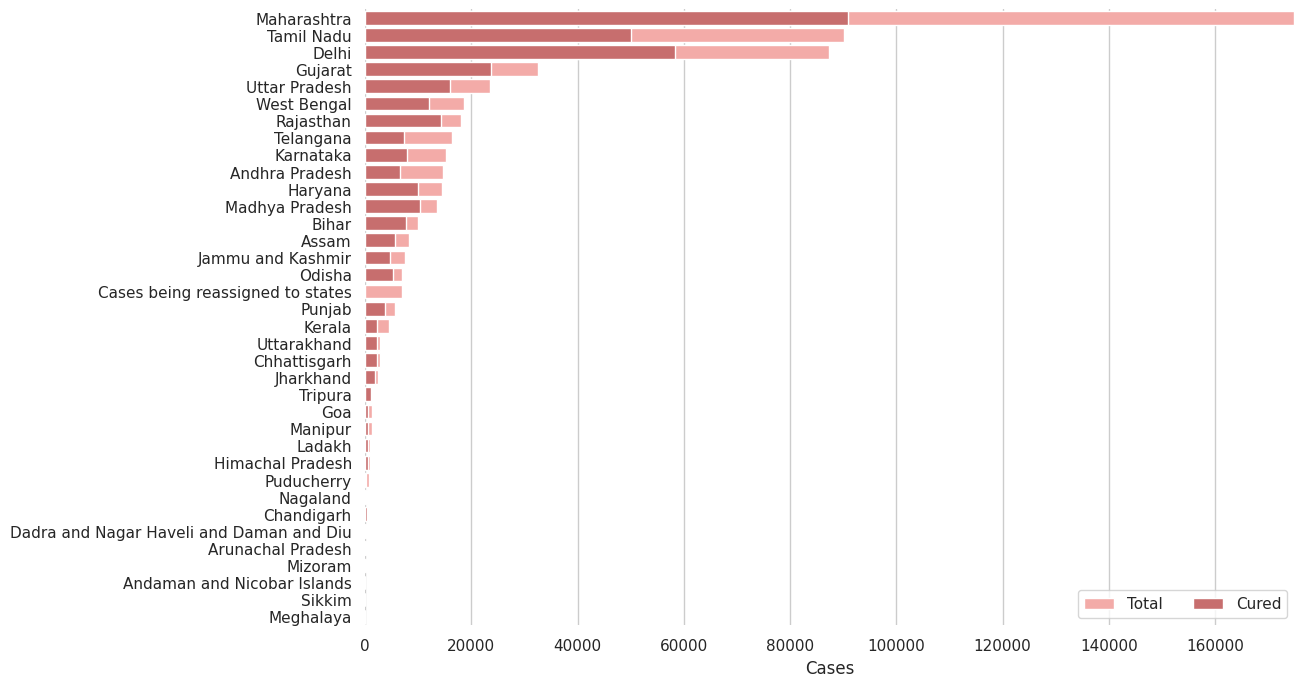

In [14]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12,8))
data = cases_per_state[['Name of State / UT', 'Cured/Discharged/Migrated', 'Deaths', 'Total Confirmed cases']]
sns.set_color_codes('pastel')
sns.barplot(x='Total Confirmed cases', y='Name of State / UT', data=data, label='Total', color='r')
sns.set_color_codes('muted')
sns.barplot(x='Cured/Discharged/Migrated', y='Name of State / UT', data=data, label='Cured', color='r')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 175000), ylabel = "", xlabel = 'Cases')
sns.despine(left=True, bottom=True)

## Global data Analysis

In [15]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-30-2020.csv')

In [16]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-01 04:33:52,34.223334,-82.461707,113,0,0,113,"Abbeville, South Carolina, US",460.716761,0.000000
1,22001.0,Acadia,Louisiana,US,2020-07-01 04:33:52,30.295065,-92.414197,878,36,0,842,"Acadia, Louisiana, US",1415.101942,4.100228
2,51001.0,Accomack,Virginia,US,2020-07-01 04:33:52,37.767072,-75.632346,1042,14,0,1028,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-01 04:33:52,43.452658,-116.241552,2169,23,0,2146,"Ada, Idaho, US",450.385912,1.060396
4,19001.0,Adair,Iowa,US,2020-07-01 04:33:52,41.330756,-94.471059,15,0,0,15,"Adair, Iowa, US",209.731544,0.000000


In [17]:
latest_data.drop(['Admin2', 'Province_State', 'Last_Update','Lat', 'Long_', 'Combined_Key', 'FIPS'], axis=1, inplace=True)

In [18]:
latest_data = latest_data.groupby('Country_Region').sum()

In [19]:
latest_data.sort_values('Confirmed', ascending=False, inplace=True)
latest_data

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Country_Region,,,,,,
US,2653658,127095,720631,2520535,1.582694e+06,14513.936052
Brazil,1412669,59792,788318,554849,2.651673e+04,86.608016
Russia,646929,9306,411973,225650,3.165465e+04,82.046419
India,585493,17400,347979,220114,1.889071e+03,48.875059
United Kingdom,314157,56284,1370,268975,3.877246e+03,109.479287
...,...,...,...,...,...,...
Nauru,0,0,0,0,0.000000e+00,0.000000
Kiribati,0,0,0,0,0.000000e+00,0.000000
Summer Olympics 2020,0,0,0,0,0.000000e+00,0.000000


### Top 10 countries ranked according to confirmed cases

In [20]:
latest_data.head(10).style.background_gradient(cmap='Blues')

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Country_Region,,,,,,
US,2653658,127095,720631,2520535,1582693.665427,14513.936052
Brazil,1412669,59792,788318,554849,26516.727352,86.608016
Russia,646929,9306,411973,225650,31654.653358,82.046419
India,585493,17400,347979,220114,1889.070751,48.875059
United Kingdom,314157,56284,1370,268975,3877.246075,109.479287
Peru,285213,37898,174535,247315,15493.398457,261.920384
Chile,279393,5688,241229,32574,12289.734104,18.548711
Spain,249271,28355,150376,76013,9266.703545,195.645163
Italy,240578,34767,190248,15563,7832.999380,229.406425


### Comparing India with US, Italy and China

In [21]:
cols = global_confirmed_cases.keys()
confirmed = global_confirmed_cases.loc[:, cols[1]:cols[-1]]
deaths = global_death_cases.loc[:, cols[1]:cols[-1]]
recoveries = global_recovered_cases.loc[:, cols[1]:cols[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,0,0,0,0,0,0,0,0,0,0,...,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,0,0,0,0,0,0,0,0,0,0,...,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,0,0,0,0,0,0,0,0,0,0,...,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,183,186,189,197,212,212,259,267,276,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,698,702,707,710,711,712,713,713,713,714
262,0,0,0,0,0,0,0,0,0,0,...,941,967,992,1015,1076,1089,1103,1118,1128,1158
263,0,0,0,0,0,0,0,0,0,0,...,247,247,265,265,272,272,272,272,272,303
264,0,0,0,0,0,0,0,0,0,0,...,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900


In [22]:
dates = confirmed.keys()

world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

china_cases = []
italy_cases = []
us_cases = []
india_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
india_deaths = []


china_recoveries = []
italy_recoveries = []
us_recoveries = []
india_recoveries = []

In [23]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()

    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)


    china_cases.append(global_confirmed_cases[global_confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(global_confirmed_cases[global_confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(global_confirmed_cases[global_confirmed_cases['Country/Region']=='US'][i].sum())
    india_cases.append(global_confirmed_cases[global_confirmed_cases['Country/Region']=='India'][i].sum())


    china_deaths.append(global_death_cases[global_death_cases['Country/Region']=='China'][i].sum())
    italy_deaths.append(global_death_cases[global_death_cases['Country/Region']=='Italy'][i].sum())
    us_deaths.append(global_death_cases[global_death_cases['Country/Region']=='US'][i].sum())
    india_deaths.append(global_death_cases[global_death_cases['Country/Region']=='India'][i].sum())


    china_recoveries.append(global_recovered_cases[global_recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(global_recovered_cases[global_recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(global_recovered_cases[global_recovered_cases['Country/Region']=='US'][i].sum())
    india_recoveries.append(global_recovered_cases[global_recovered_cases['Country/Region']=='India'][i].sum())

In [24]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79525,
 80372,
 81346,
 82704,
 84070,
 85967,
 88325,
 90262,
 92795,
 95075,
 97844,
 101761,
 105782,
 109754,
 113536,
 118375,
 125704,
 130909,
 145204,
 156283,
 167022,
 181452,
 196917,
 216161,
 243084,
 272698,
 304844,
 337597,
 378381,
 418569,
 468155,
 530138,
 594178,
 661544,
 720695,
 783580,
 858317,
 933905,
 1014713,
 1097193,
 1177447,
 1251123,
 1322598,
 1397537,
 1481490,
 1567423,
 1659674,
 1737813,
 1836615,
 1906692,
 1977287,
 2057584,
 2153578,
 2242537,
 2316591,
 2399451,
 2472264,
 2546905,
 2622750,
 2711635,
 2799064,
 2884420,
 2958352,
 3027215,
 3101078,
 3176596,
 3261450,
 3349915,
 3432050,
 3511157,
 3587874,
 3668635,
 3760836,
 3851895,
 3945002,
 4030363,
 4108270,
 4184838,
 4268247,
 4353211

In [25]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

[Text(0.5, 0, 'Dates from 1/22/20 to 6/30/20'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'Trend of confirmed cases in India')]

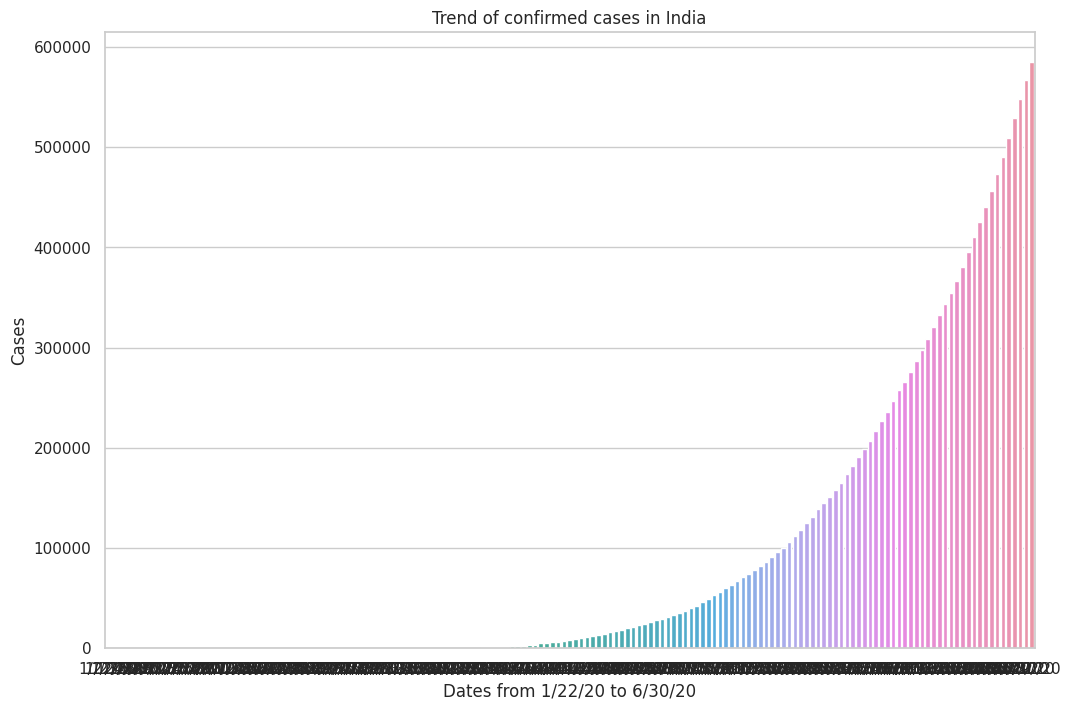

In [26]:
f, ax = plt.subplots(figsize=(12,8))
data_india = pd.DataFrame({'dates': dates, 'cases': india_cases})
sns.barplot(x='dates', y='cases', data=data_india)
sns.set(style="whitegrid")
ax.set(xlabel = "Dates from 1/22/20 to 6/30/20", ylabel = 'Cases', title="Trend of confirmed cases in India")

[Text(0.5, 0, 'Dates from 1/22/20 to 6/30/20'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'Trend of confirmed cases in China')]

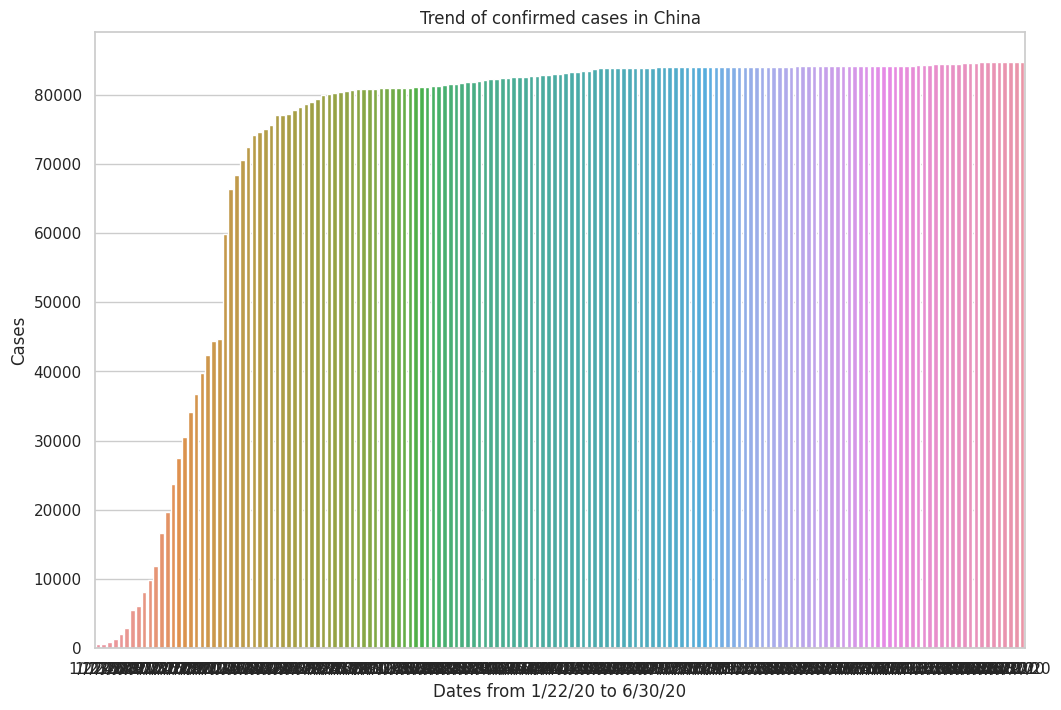

In [27]:
f, ax = plt.subplots(figsize=(12,8))
data_china = pd.DataFrame({'dates': dates, 'cases': china_cases})
sns.barplot(x='dates', y='cases', data=data_china)
sns.set(style="whitegrid")
ax.set(xlabel = "Dates from 1/22/20 to 6/30/20", ylabel = 'Cases', title="Trend of confirmed cases in China")

[Text(0.5, 0, 'Dates from 1/22/20 to 6/30/20'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'Trend of confirmed cases in US')]

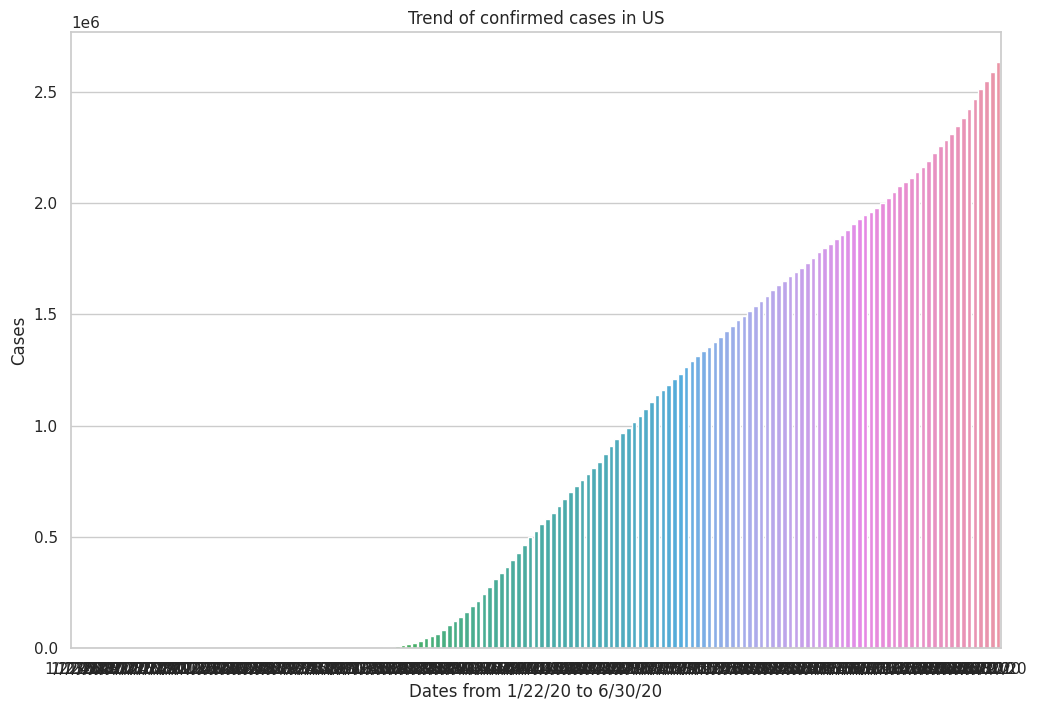

In [28]:
f, ax = plt.subplots(figsize=(12,8))
data_us = pd.DataFrame({'dates': dates, 'cases': us_cases})
sns.barplot(x='dates', y='cases', data=data_us)
sns.set(style="whitegrid")
ax.set(xlabel = "Dates from 1/22/20 to 6/30/20", ylabel = 'Cases', title="Trend of confirmed cases in US")

[Text(0.5, 0, 'Dates from 1/22/20 to 6/30/20'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'Trend of confirmed cases in Italy')]

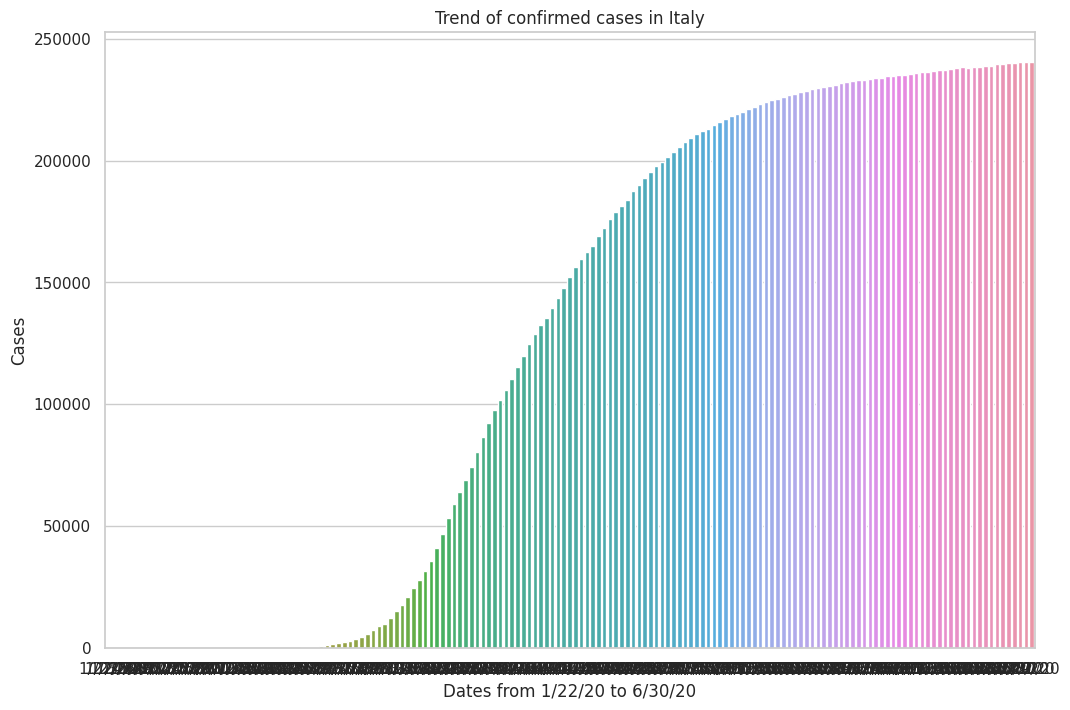

In [29]:
f, ax = plt.subplots(figsize=(12,8))
data_italy = pd.DataFrame({'dates': dates, 'cases': italy_cases})
sns.barplot(x='dates', y='cases', data=data_italy)
sns.set(style="whitegrid")
ax.set(xlabel = "Dates from 1/22/20 to 6/30/20", ylabel = 'Cases', title="Trend of confirmed cases in Italy")

In [30]:
confirmed_cases = global_confirmed_cases.groupby('Country/Region').sum()
death_cases = global_death_cases.groupby('Country/Region').sum()
recovered_cases = global_recovered_cases.groupby('Country/Region').sum()

Text(0.5, 1.0, 'India vs US vs China vs Italy - Confirmed Cases')

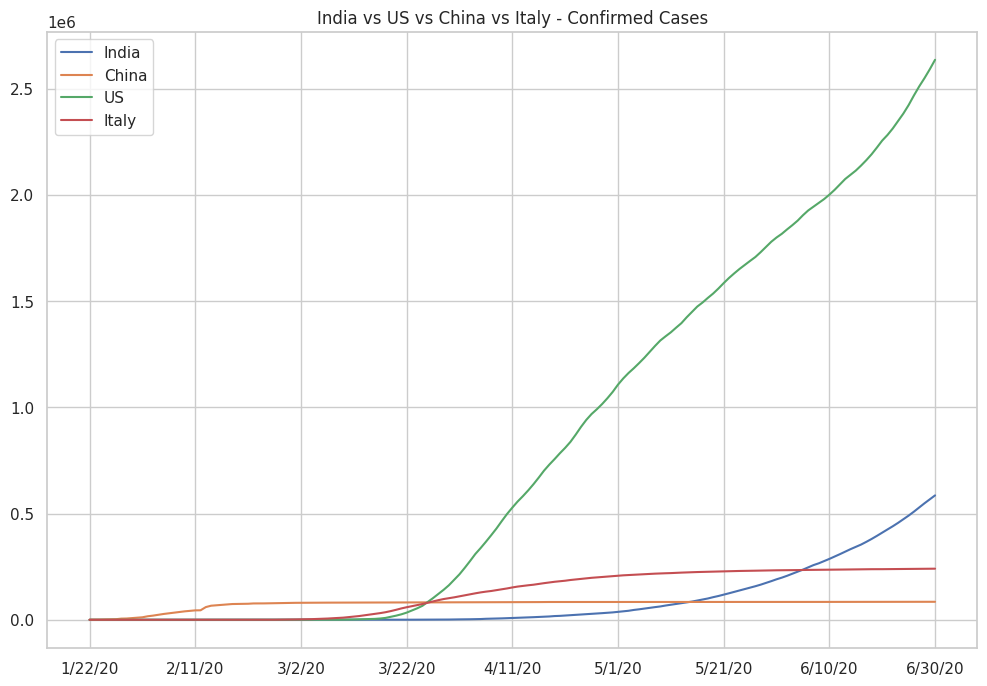

In [31]:
fig = plt.figure(figsize=(12, 8))
confirmed_cases.loc['India'].plot()
confirmed_cases.loc['China'].plot()
confirmed_cases.loc['US'].plot()
confirmed_cases.loc['Italy'].plot()
plt.legend()
plt.title('India vs US vs China vs Italy - Confirmed Cases')

Text(0.5, 1.0, 'India vs US vs China vs Italy - Deaths Reported')

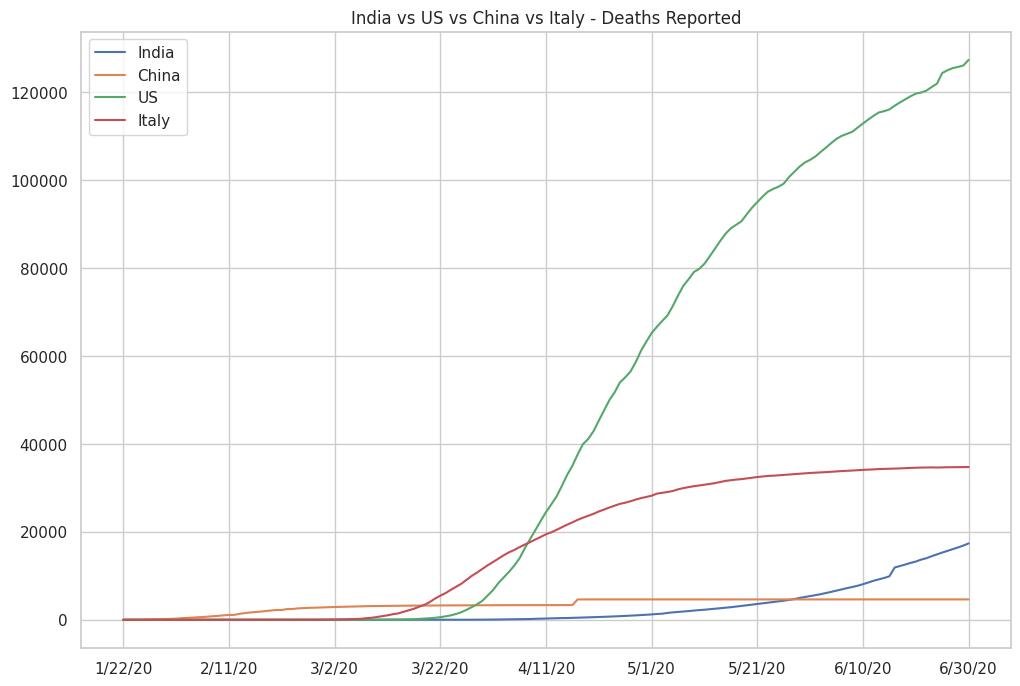

In [32]:
fig = plt.figure(figsize=(12, 8))
death_cases.loc['India'].plot()
death_cases.loc['China'].plot()
death_cases.loc['US'].plot()
death_cases.loc['Italy'].plot()
plt.legend()
plt.title('India vs US vs China vs Italy - Deaths Reported')

Text(0.5, 1.0, 'India vs US vs China vs Italy - Recovered Cases')

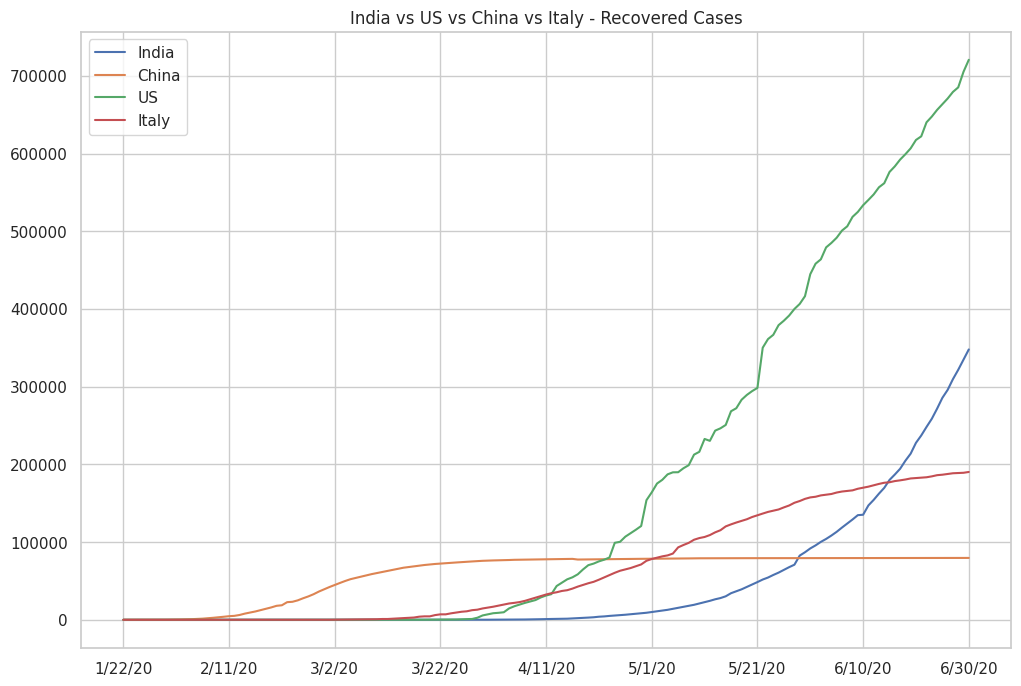

In [33]:
fig = plt.figure(figsize=(12, 8))
recovered_cases.loc['India'].plot()
recovered_cases.loc['China'].plot()
recovered_cases.loc['US'].plot()
recovered_cases.loc['Italy'].plot()
plt.legend()
plt.title('India vs US vs China vs Italy - Recovered Cases')

## Predicting future values

In [34]:
import numpy as np
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator

In [35]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [36]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
india_daily_increase = daily_increase(india_cases)

In [37]:
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
india_daily_death = daily_increase(india_deaths)

In [38]:
# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [39]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
india_cases = np.array(india_cases).reshape(-1, 1)
india_deaths = np.array(india_deaths).reshape(-1, 1)
india_recovered = np.array(india_recoveries).reshape(-1, 1)

In [40]:
days_in_future = 30
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-30]

In [41]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [42]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [43]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, india_cases, test_size=0.05, shuffle=False)

In [44]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [45]:
# polynomial regression
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 4062.869679295031
MSE: 26979824.66846048


In [46]:
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-30:], 'Predicted number of Confirmed Cases in India': np.round(linear_pred[-30:])})
poly_df

,Date,Predicted number of Confirmed Cases in India
0,07/01/2020,595915.0
1,07/02/2020,615232.0
2,07/03/2020,635010.0
3,07/04/2020,655258.0
4,07/05/2020,675981.0
5,07/06/2020,697188.0
6,07/07/2020,718886.0
7,07/08/2020,741083.0
8,07/09/2020,763785.0
9,07/10/2020,787000.0


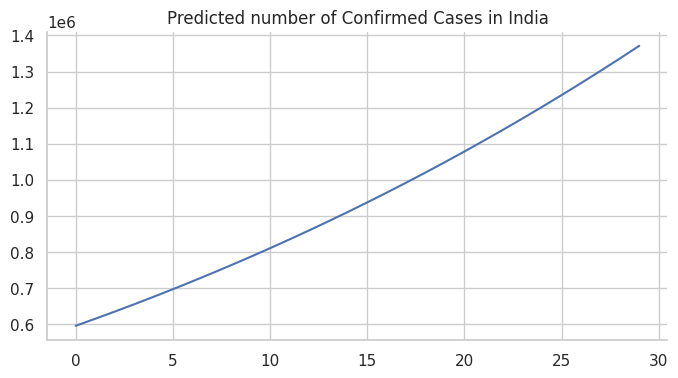

In [47]:
from matplotlib import pyplot as plt
poly_df['Predicted number of Confirmed Cases in India'].plot(kind='line', figsize=(8, 4), title='Predicted number of Confirmed Cases in India')
plt.gca().spines[['top', 'right']].set_visible(False)

In [48]:
from prophet import Prophet

In [49]:
cases = []
for i in range(0,161,1):
    cases.append(india_cases[i][0])
india = pd.DataFrame({'ds': dates, 'y': cases})
india.tail()

,ds,y
156,6/26/20,508953
157,6/27/20,528859
158,6/28/20,548318
159,6/29/20,566840
160,6/30/20,585481


In [50]:
m = Prophet(interval_width=0.95)
m.fit(india)
future = m.make_future_dataframe(periods=7)
future.tail(7)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp611_5zqv/9smfxnwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp611_5zqv/d8zrc3oq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29368', 'data', 'file=/tmp/tmp611_5zqv/9smfxnwh.json', 'init=/tmp/tmp611_5zqv/d8zrc3oq.json', 'output', 'file=/tmp/tmp611_5zqv/prophet_modelk0vjjdop/prophet_model-20231028085715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:57:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:57:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
161,2020-07-01
162,2020-07-02
163,2020-07-03
164,2020-07-04
165,2020-07-05
166,2020-07-06
167,2020-07-07


In [51]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
161,2020-07-01,553246.517169,537564.202823,569092.132907
162,2020-07-02,565530.956684,548975.318286,581229.808032
163,2020-07-03,577634.036600,561292.487761,593843.765160
164,2020-07-04,589963.508608,574056.084240,605878.670012
165,2020-07-05,602325.463314,584755.644612,618842.561720
166,2020-07-06,614399.064991,597508.418671,631224.778403
167,2020-07-07,626651.848676,609174.547088,645186.591685


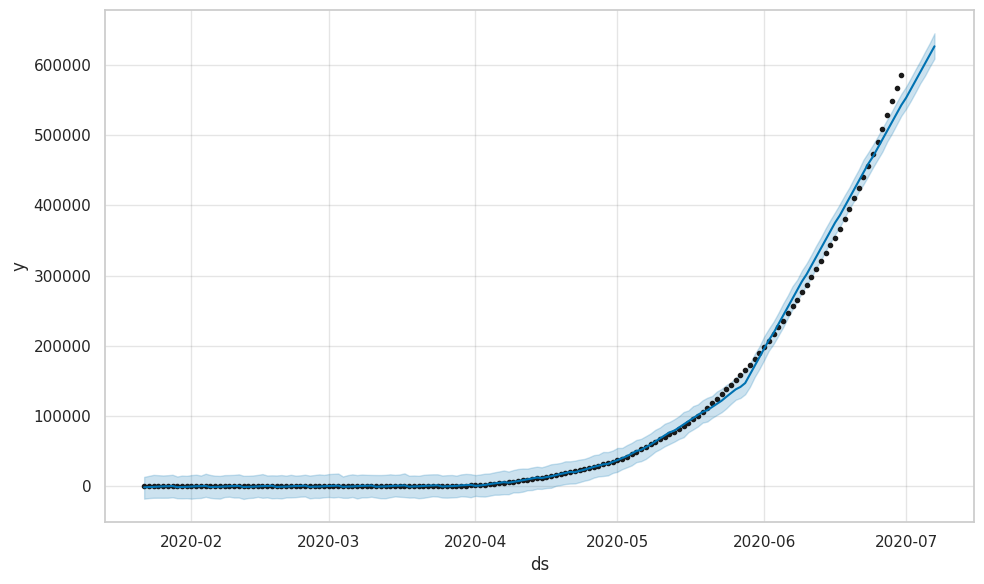

In [52]:
confirmed_forecast_plot = m.plot(forecast)

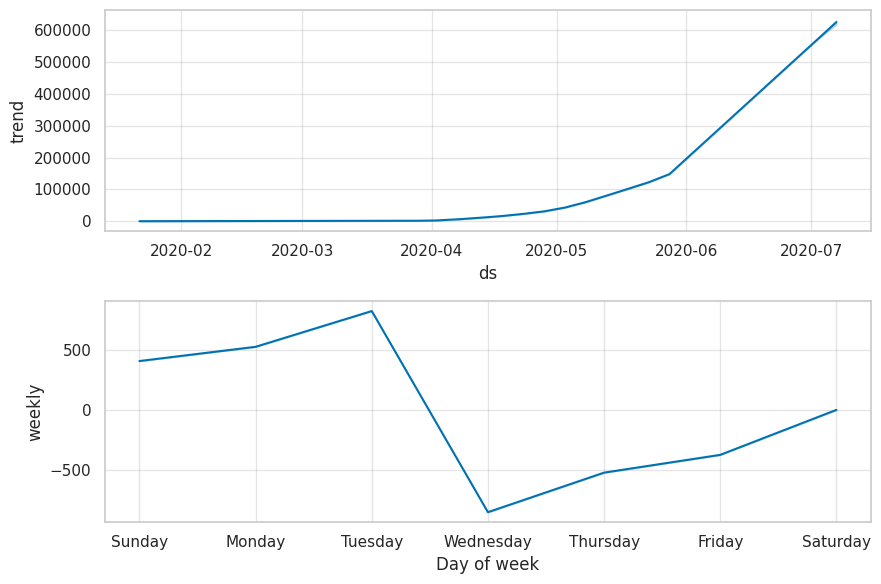

In [53]:
confirmed_forecast_plot =m.plot_components(forecast)